In [1]:
import pandas as pd
from datetime import datetime


import numpy as np
import pandas as pd

# For plotting maps
import folium

# For Regular Expressions
import re

# For working with geographical data
import geopandas

# For plotting in python
import matplotlib
import matplotlib.pyplot as plt

In [3]:
cd ..

C:\Users\priya\Documents\end-end_Projects\HDB_Pricing


In [4]:

df = pd.read_csv( "./data/RentingOutofFlats.csv" ,low_memory=False)
df

,rent_approval_date,town,block,street_name,flat_type,monthly_rent
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000
1,2021-01,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750
2,2021-01,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750
3,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230
4,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450
...,...,...,...,...,...,...
109314,2023-12,QUEENSTOWN,59,STRATHMORE AVE,4-ROOM,4100
109315,2023-12,WOODLANDS,681D,WOODLANDS DR 62,4-ROOM,3300
109316,2023-12,CHOA CHU KANG,354,CHOA CHU KANG CTRL,4-ROOM,2950
109317,2023-12,YISHUN,717,YISHUN ST 71,4-ROOM,3200


In [3]:
df.isna().sum()

rent_approval_date    0
town                  0
block                 0
street_name           0
flat_type             0
monthly_rent          0
dtype: int64

In [4]:
df.dtypes

rent_approval_date    object
town                  object
block                 object
street_name           object
flat_type             object
monthly_rent           int64
dtype: object

In [5]:

df["rent_approval_date"] = pd.to_datetime(df["rent_approval_date"])
df['rent_approval_date'] = df['rent_approval_date'].dt.to_period('M')

In [6]:
df["town"]=df["town"].replace({'CENTRAL': 'CENTRAL AREA'})

In [7]:
df["flat_type"].unique()

array(['4-ROOM', '3-ROOM', '5-ROOM', '2-ROOM', 'EXECUTIVE', '1-ROOM'],
      dtype=object)

In [40]:
df["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [29]:
import streamlit as st

long_text = "Lorem ipsum. " * 1000

with st.container():
    st.markdown(long_text)

2024-02-16 03:26:35.326 
  command:

    streamlit run C:\Users\priya\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [9]:
resale_towns= ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL']


rental_towns=['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN']

In [10]:
list(set(resale_towns) - set(rental_towns))

['LIM CHU KANG']

In [11]:
list(set(rental_towns)- set(resale_towns))

[]

## Mapping

In [12]:
sg_geojson=geopandas.read_file('./data/main.geojson')
sg_geojson

,name,geometry
0,PASIR RIS,"MULTIPOLYGON (((104.03297 1.35879, 104.03303 1..."
1,GEYLANG,"MULTIPOLYGON (((103.88375 1.30459, 103.88386 1..."
2,JURONG WEST,"MULTIPOLYGON (((103.69729 1.30754, 103.69745 1..."
3,WOODLANDS,"POLYGON ((103.77673 1.45150, 103.77664 1.45145..."
4,CENTRAL AREA,"MULTIPOLYGON (((103.81882 1.39434, 103.81716 1..."
5,SEMBAWANG,"MULTIPOLYGON (((103.83669 1.44562, 103.83689 1..."
6,SENGKANG,"MULTIPOLYGON (((103.89741 1.41491, 103.89715 1..."
7,BISHAN,"POLYGON ((103.85686 1.35551, 103.85633 1.35565..."
8,BUKIT BATOK,"POLYGON ((103.77038 1.34902, 103.77034 1.34911..."
9,BUKIT MERAH,"POLYGON ((103.83181 1.29215, 103.83163 1.29213..."


In [13]:
set(sg_geojson.name)-set(rental_towns)

{'LIM CHU KANG',
 'NORTH-EASTERN ISLANDS',
 'SOUTHERN ISLANDS',
 'WESTERN ISLANDS'}

In [14]:
sg=(sg_geojson.loc[sg_geojson['name'].isin(rental_towns)])
sg.reset_index(drop=True, inplace=True)
sg

,name,geometry
0,PASIR RIS,"MULTIPOLYGON (((104.03297 1.35879, 104.03303 1..."
1,GEYLANG,"MULTIPOLYGON (((103.88375 1.30459, 103.88386 1..."
2,JURONG WEST,"MULTIPOLYGON (((103.69729 1.30754, 103.69745 1..."
3,WOODLANDS,"POLYGON ((103.77673 1.45150, 103.77664 1.45145..."
4,CENTRAL AREA,"MULTIPOLYGON (((103.81882 1.39434, 103.81716 1..."
5,SEMBAWANG,"MULTIPOLYGON (((103.83669 1.44562, 103.83689 1..."
6,SENGKANG,"MULTIPOLYGON (((103.89741 1.41491, 103.89715 1..."
7,BISHAN,"POLYGON ((103.85686 1.35551, 103.85633 1.35565..."
8,BUKIT BATOK,"POLYGON ((103.77038 1.34902, 103.77034 1.34911..."
9,BUKIT MERAH,"POLYGON ((103.83181 1.29215, 103.83163 1.29213..."


In [15]:
towns = dict(df['town'].value_counts())

In [16]:
print(len(towns))
towns

26


{'JURONG WEST': 7608,
 'TAMPINES': 7341,
 'SENGKANG': 7078,
 'BEDOK': 6491,
 'ANG MO KIO': 6044,
 'BUKIT MERAH': 5932,
 'YISHUN': 5819,
 'WOODLANDS': 5563,
 'HOUGANG': 5190,
 'PUNGGOL': 4753,
 'QUEENSTOWN': 4443,
 'TOA PAYOH': 4410,
 'KALLANG/WHAMPOA': 4107,
 'BUKIT BATOK': 3980,
 'CLEMENTI': 3934,
 'CHOA CHU KANG': 3879,
 'GEYLANG': 3344,
 'PASIR RIS': 3047,
 'JURONG EAST': 2939,
 'BUKIT PANJANG': 2764,
 'SEMBAWANG': 2563,
 'SERANGOON': 2468,
 'BISHAN': 2464,
 'CENTRAL AREA': 1637,
 'MARINE PARADE': 1180,
 'BUKIT TIMAH': 341}

In [17]:
sgc=sg.copy()
sgc["sales"] = sgc["name"].map(towns)
sgc

,name,geometry,sales
0,PASIR RIS,"MULTIPOLYGON (((104.03297 1.35879, 104.03303 1...",3047
1,GEYLANG,"MULTIPOLYGON (((103.88375 1.30459, 103.88386 1...",3344
2,JURONG WEST,"MULTIPOLYGON (((103.69729 1.30754, 103.69745 1...",7608
3,WOODLANDS,"POLYGON ((103.77673 1.45150, 103.77664 1.45145...",5563
4,CENTRAL AREA,"MULTIPOLYGON (((103.81882 1.39434, 103.81716 1...",1637
5,SEMBAWANG,"MULTIPOLYGON (((103.83669 1.44562, 103.83689 1...",2563
6,SENGKANG,"MULTIPOLYGON (((103.89741 1.41491, 103.89715 1...",7078
7,BISHAN,"POLYGON ((103.85686 1.35551, 103.85633 1.35565...",2464
8,BUKIT BATOK,"POLYGON ((103.77038 1.34902, 103.77034 1.34911...",3980
9,BUKIT MERAH,"POLYGON ((103.83181 1.29215, 103.83163 1.29213...",5932


In [18]:
sgc.explore("sales", cmap="Purples",tiles="CartoDB positron")

## STATS

C:\Users\priya\AppData\Local\Temp\ipykernel_24284\2014713482.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


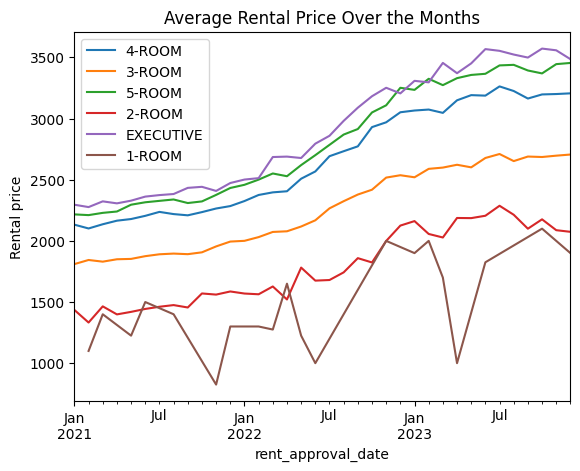

In [41]:
ft= ['4-ROOM', '3-ROOM', '5-ROOM', '2-ROOM', 'EXECUTIVE', '1-ROOM']

fig, ax = plt.subplots()


for ftype in ft:
    flat = df[df["flat_type"] == ftype]
    flat.groupby(flat['rent_approval_date'])['monthly_rent'].mean().plot()

ax.legend(ft)
plt.ylabel("Rental price")
plt.title("Average Rental Price Over the Months")
fig.show()

In [20]:
new_df=df[df['town']== 'TAMPINES']

In [21]:
new_df

,rent_approval_date,town,block,street_name,flat_type,monthly_rent
2563,2021-01,TAMPINES,102,SIMEI ST 1,5-ROOM,2350
2564,2021-01,TAMPINES,103,TAMPINES ST 11,3-ROOM,1000
2565,2021-01,TAMPINES,103,TAMPINES ST 11,3-ROOM,2200
2566,2021-01,TAMPINES,106,SIMEI ST 1,5-ROOM,2000
2567,2021-01,TAMPINES,107,TAMPINES ST 11,4-ROOM,2000
...,...,...,...,...,...,...
109258,2023-12,TAMPINES,255,SIMEI ST 1,5-ROOM,4000
109264,2023-12,TAMPINES,424,TAMPINES ST 41,3-ROOM,3000
109277,2023-12,TAMPINES,519A,TAMPINES CTRL 8,4-ROOM,3800
109304,2023-12,TAMPINES,256,SIMEI ST 1,4-ROOM,2900


In [22]:
#plt.plot_date(new_df["rent_approval_date"], new_df["monthly_rent"], c = 'red')

In [43]:
present

['4-ROOM', '3-ROOM', '5-ROOM', '2-ROOM', 'EXECUTIVE']

C:\Users\priya\AppData\Local\Temp\ipykernel_24284\2685697179.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


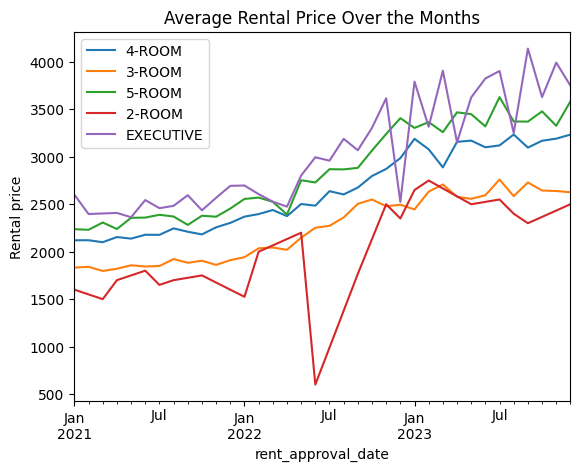

In [42]:



new_df=df[df['town']== 'TAMPINES']

ft= ['4-ROOM', '3-ROOM', '5-ROOM', '2-ROOM', 'EXECUTIVE', '1-ROOM']
present=[]
fig, ax = plt.subplots()


for ftype in ft:
    flat = new_df[new_df["flat_type"] == ftype]
    if flat.empty:
        pass
    else:
        present.append(ftype)
        flat.groupby(flat['rent_approval_date'])['monthly_rent'].mean().plot()

ax.legend(present)
plt.ylabel("Rental price")
plt.title("Average Rental Price Over the Months")
fig.show()

In [114]:
thing = new_df[new_df["flat_type"] == "5-ROOM"]

In [115]:
thing

,rent_approval_date,town,block,street_name,flat_type,monthly_rent
2563,2021-01,TAMPINES,102,SIMEI ST 1,5-ROOM,2350
2566,2021-01,TAMPINES,106,SIMEI ST 1,5-ROOM,2000
2573,2021-01,TAMPINES,114,SIMEI ST 1,5-ROOM,2300
2574,2021-01,TAMPINES,117,SIMEI ST 1,5-ROOM,1730
2575,2021-01,TAMPINES,119,SIMEI ST 1,5-ROOM,2400
...,...,...,...,...,...,...
109141,2023-12,TAMPINES,302,TAMPINES ST 32,5-ROOM,2900
109150,2023-12,TAMPINES,841,TAMPINES ST 83,5-ROOM,3400
109153,2023-12,TAMPINES,522B,TAMPINES CTRL 7,5-ROOM,2200
109211,2023-12,TAMPINES,243,SIMEI ST 5,5-ROOM,4000


In [105]:
new_df

,rent_approval_date,town,block,street_name,flat_type,monthly_rent
2563,2021-01,TAMPINES,102,SIMEI ST 1,5-ROOM,2350
2564,2021-01,TAMPINES,103,TAMPINES ST 11,3-ROOM,1000
2565,2021-01,TAMPINES,103,TAMPINES ST 11,3-ROOM,2200
2566,2021-01,TAMPINES,106,SIMEI ST 1,5-ROOM,2000
2567,2021-01,TAMPINES,107,TAMPINES ST 11,4-ROOM,2000
...,...,...,...,...,...,...
109258,2023-12,TAMPINES,255,SIMEI ST 1,5-ROOM,4000
109264,2023-12,TAMPINES,424,TAMPINES ST 41,3-ROOM,3000
109277,2023-12,TAMPINES,519A,TAMPINES CTRL 8,4-ROOM,3800
109304,2023-12,TAMPINES,256,SIMEI ST 1,4-ROOM,2900


In [86]:
ft = dict(df['flat_type'].value_counts())

In [100]:
def get_others(dic, key):
    x=dic.get(key)
    if x== None:
        return 0
    else:
        return x
    
get_val(flat_types, "MULTI-GENERATIONAL")
    
    

0

In [101]:
flat_types = dict(df['flat_type'].value_counts())
combined= get_val(flat_types, "1-ROOM") + get_val(flat_types, "2-ROOM") + get_val(flat_types, "MULTI-GENERATIONAL")
flat_types["OTHERS"]= combined
flat_types.pop('1-ROOM', None)
flat_types.pop('2-ROOM', None)
flat_types.pop('MULTI-GENERATIONAL', None)

In [102]:
flat_types

{'4-ROOM': 39219,
 '3-ROOM': 35586,
 '5-ROOM': 26248,
 'EXECUTIVE': 6221,
 'OTHERS': 2045}

In [104]:
tuple(flat_types)

('4-ROOM', '3-ROOM', '5-ROOM', 'EXECUTIVE', 'OTHERS')

In [106]:
list(flat_types.values())

[39219, 35586, 26248, 6221, 2045]

In [98]:
type(int(flat_types.get("MULTI-GENERATIONAL")))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [89]:
ft.pop('4-ROOM', None)

39219

In [90]:
ft

{'3-ROOM': 35586,
 '5-ROOM': 26248,
 'EXECUTIVE': 6221,
 '2-ROOM': 2016,
 '1-ROOM': 29}

In [78]:
ft.index

Index(['4-ROOM', '3-ROOM', '5-ROOM', 'EXECUTIVE', '2-ROOM', '1-ROOM'], dtype='object', name='flat_type')

In [72]:
list(ft)

[39219, 35586, 26248, 6221, 2016, 29]

In [62]:
ft.items()

dict_items([('4-ROOM', 39219), ('3-ROOM', 35586), ('5-ROOM', 26248), ('EXECUTIVE', 6221), ('2-ROOM', 2016), ('1-ROOM', 29)])

In [85]:
ft

{'4-ROOM': 39219,
 '3-ROOM': 35586,
 '5-ROOM': 26248,
 'EXECUTIVE': 6221,
 '2-ROOM': 2016,
 '1-ROOM': 29}

In [75]:
type(x)

tuple

In [74]:
x='Python', 'Java', 'C++', 'JavaScript'

In [77]:
ft

flat_type
4-ROOM       39219
3-ROOM       35586
5-ROOM       26248
EXECUTIVE     6221
2-ROOM        2016
1-ROOM          29
Name: count, dtype: int64

In [91]:
ft.get("1-ROOM") + ft["2-ROOM"]

2045

In [ ]:
tuple(ft.index)

# MRT STATIONS

In [10]:
df

,rent_approval_date,town,block,street_name,flat_type,monthly_rent
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000
1,2021-01,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750
2,2021-01,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750
3,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230
4,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450
...,...,...,...,...,...,...
109314,2023-12,QUEENSTOWN,59,STRATHMORE AVE,4-ROOM,4100
109315,2023-12,WOODLANDS,681D,WOODLANDS DR 62,4-ROOM,3300
109316,2023-12,CHOA CHU KANG,354,CHOA CHU KANG CTRL,4-ROOM,2950
109317,2023-12,YISHUN,717,YISHUN ST 71,4-ROOM,3200


In [11]:
hdb_locations = pd.read_csv("./data/sg_zipcode_mapper_utf.csv")
hdb_locations = hdb_locations.drop('Unnamed: 0', axis=1)
hdb_locations= hdb_locations.drop('postal.1', axis=1)

In [20]:
data=pd.merge(df,hdb_locations, on=['block','street_name'],how="outer")
data

,rent_approval_date,town,block,street_name,flat_type,monthly_rent,postal,lat,lng,searchval,building,address
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000.0,560105.0,1.372313,103.837601,KEBUN BARU HTS,KEBUN BARU HTS,105 ANG MO KIO AVE 4 KEBUN BARU HTS SINGAPORE ...
1,2021-07,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2100.0,560105.0,1.372313,103.837601,KEBUN BARU HTS,KEBUN BARU HTS,105 ANG MO KIO AVE 4 KEBUN BARU HTS SINGAPORE ...
2,2021-07,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2800.0,560105.0,1.372313,103.837601,KEBUN BARU HTS,KEBUN BARU HTS,105 ANG MO KIO AVE 4 KEBUN BARU HTS SINGAPORE ...
3,2021-09,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2400.0,560105.0,1.372313,103.837601,KEBUN BARU HTS,KEBUN BARU HTS,105 ANG MO KIO AVE 4 KEBUN BARU HTS SINGAPORE ...
4,2022-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2700.0,560105.0,1.372313,103.837601,KEBUN BARU HTS,KEBUN BARU HTS,105 ANG MO KIO AVE 4 KEBUN BARU HTS SINGAPORE ...
...,...,...,...,...,...,...,...,...,...,...,...,...
126170,NaT,NaN,9,FAJAR RD,NaN,NaN,679002.0,1.379549,103.769313,ZHENGHUA PRIMARY SCHOOL,ZHENGHUA PRIMARY SCHOOL,9 FAJAR RD ZHENGHUA PRIMARY SCHOOL SINGAPORE 6...
126171,NaT,NaN,91,SENJA RD,NaN,NaN,677741.0,1.388369,103.765522,ZHENGHUA SECONDARY SCHOOL,ZHENGHUA SECONDARY SCHOOL,91 SENJA RD ZHENGHUA SECONDARY SCHOOL SINGAPOR...
126172,NaT,NaN,13,SERANGOON AVE 3,NaN,NaN,556123.0,1.348407,103.869431,ZHONGHUA SECONDARY SCHOOL,ZHONGHUA SECONDARY SCHOOL,13 SERANGOON AVE 3 ZHONGHUA SECONDARY SCHOOL S...
126173,NaT,NaN,4,BISHAN ST 13,NaN,NaN,579792.0,1.347091,103.854878,ZION BISHAN BIBLE PRESBYTERIAN CHURCH,ZION BISHAN BIBLE PRESBYTERIAN CHURCH,4 BISHAN ST 13 ZION BISHAN BIBLE PRESBYTERIAN ...


In [21]:
data=data.dropna()
data.reset_index(drop=True, inplace=True)
data

,rent_approval_date,town,block,street_name,flat_type,monthly_rent,postal,lat,lng,searchval,building,address
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000.0,560105.0,1.372313,103.837601,KEBUN BARU HTS,KEBUN BARU HTS,105 ANG MO KIO AVE 4 KEBUN BARU HTS SINGAPORE ...
1,2021-07,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2100.0,560105.0,1.372313,103.837601,KEBUN BARU HTS,KEBUN BARU HTS,105 ANG MO KIO AVE 4 KEBUN BARU HTS SINGAPORE ...
2,2021-07,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2800.0,560105.0,1.372313,103.837601,KEBUN BARU HTS,KEBUN BARU HTS,105 ANG MO KIO AVE 4 KEBUN BARU HTS SINGAPORE ...
3,2021-09,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2400.0,560105.0,1.372313,103.837601,KEBUN BARU HTS,KEBUN BARU HTS,105 ANG MO KIO AVE 4 KEBUN BARU HTS SINGAPORE ...
4,2022-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2700.0,560105.0,1.372313,103.837601,KEBUN BARU HTS,KEBUN BARU HTS,105 ANG MO KIO AVE 4 KEBUN BARU HTS SINGAPORE ...
...,...,...,...,...,...,...,...,...,...,...,...,...
106539,2023-12,SERANGOON,422,SERANGOON CTRL,4-ROOM,3400.0,550422.0,1.348850,103.876001,HDB-SERANGOON ESTATE,HDB-SERANGOON ESTATE,422 SERANGOON CTRL HDB-SERANGOON ESTATE SINGAP...
106540,2023-12,TAMPINES,822,TAMPINES ST 81,3-ROOM,2800.0,520822.0,1.348342,103.934380,HDB-TAMPINES,HDB-TAMPINES,822 TAMPINES ST 81 HDB-TAMPINES SINGAPORE 520822
106541,2023-12,HOUGANG,313,HOUGANG AVE 5,3-ROOM,3000.0,530313.0,1.365263,103.894770,313 HOUGANG AVE 5 SINGAPORE 530313,NIL,313 HOUGANG AVE 5 SINGAPORE 530313
106542,2023-12,BISHAN,238,BISHAN ST 22,EXECUTIVE,4800.0,570238.0,1.359761,103.844643,HDB-BISHAN,HDB-BISHAN,238 BISHAN ST 22 HDB-BISHAN SINGAPORE 570238


In [22]:
mrt_locations = pd.read_csv("./data/mrt_data.csv")
mrt_locations.drop(columns=['type'], inplace=True)

mrt_locations['lat_long']= mrt_locations[['lat', 'lng']].values.tolist()

mrt_locations

,station_name,lat,lng,lat_long
0,Jurong East,1.333207,103.742308,"[1.333207, 103.742308]"
1,Bukit Batok,1.349069,103.749596,"[1.349069, 103.749596]"
2,Bukit Gombak,1.359043,103.751863,"[1.359043, 103.751863]"
3,Choa Chu Kang,1.385417,103.744316,"[1.385417, 103.744316]"
4,Yew Tee,1.397383,103.747523,"[1.397383, 103.747523]"
...,...,...,...,...
114,Bedok North,1.335268,103.918054,"[1.335268, 103.918054]"
115,Bedok Reservoir,1.336595,103.933070,"[1.336595, 103.93307]"
116,Tampines West,1.345583,103.938244,"[1.345583, 103.938244]"
117,Tampines East,1.356310,103.955471,"[1.35631, 103.955471]"


In [23]:
from math import sin, cos, sqrt, atan2, radians

def earth_distance(x, y):

  # Approximate radius of earth in km
  R = 6373.0

  lat1, lng1 = radians(x[0]), radians(x[1])
  lat2, lng2 = radians(y[0]), radians(y[1])

  dlon = lng2 - lng1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  return R * c

def euclidean_distance(x, y):
  dx = x[0] - y[0]
  dy = x[1] - y[1]

  return sqrt(dx**2 + dy**2)

jurong_east = [1.333207, 103.742308]
near_amk = [1.365445, 103.842715]
print("Euclidean distance: ", euclidean_distance(jurong_east, near_amk))
print("Realistic distance: ", earth_distance(jurong_east, near_amk))


import warnings
warnings.filterwarnings('ignore')

def get_nearest_mrt(location, lat_lng_ls):
    dists=[]
    for item in lat_lng_ls:
        dists.append(earth_distance(location, item))
    return(dists.index(min(dists)), min(dists))

Euclidean distance:  0.10545546118149039
Realistic distance:  11.726844638513933


In [25]:
import warnings
warnings.filterwarnings('ignore')

    
    
data['lat_long']= data[['lat', 'lng']].values.tolist() 
data['dist_info']=data['lat_long'].apply(lambda elem: get_nearest_mrt(elem, list(mrt_locations['lat_long'])))
data['mrt_dist']=data['dist_info'].apply(lambda elem: elem[1])
data['nearest_mrt']=data['dist_info'].apply(lambda elem: mrt_locations["station_name"].iloc[elem[0]])
data = data.drop(columns=["dist_info", "lat_long"])
data = data.drop(columns=["lat", "lng", "searchval", "building", "address"])
data

,rent_approval_date,town,block,street_name,flat_type,monthly_rent,postal,mrt_dist,nearest_mrt
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000.0,560105.0,1.329716,Yio Chu Kang
1,2021-07,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2100.0,560105.0,1.329716,Yio Chu Kang
2,2021-07,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2800.0,560105.0,1.329716,Yio Chu Kang
3,2021-09,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2400.0,560105.0,1.329716,Yio Chu Kang
4,2022-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2700.0,560105.0,1.329716,Yio Chu Kang
...,...,...,...,...,...,...,...,...,...
106539,2023-12,SERANGOON,422,SERANGOON CTRL,4-ROOM,3400.0,550422.0,0.286139,Serangoon
106540,2023-12,TAMPINES,822,TAMPINES ST 81,3-ROOM,2800.0,520822.0,0.528052,Tampines West
106541,2023-12,HOUGANG,313,HOUGANG AVE 5,3-ROOM,3000.0,530313.0,0.727106,Hougang
106542,2023-12,BISHAN,238,BISHAN ST 22,EXECUTIVE,4800.0,570238.0,1.060193,Bishan


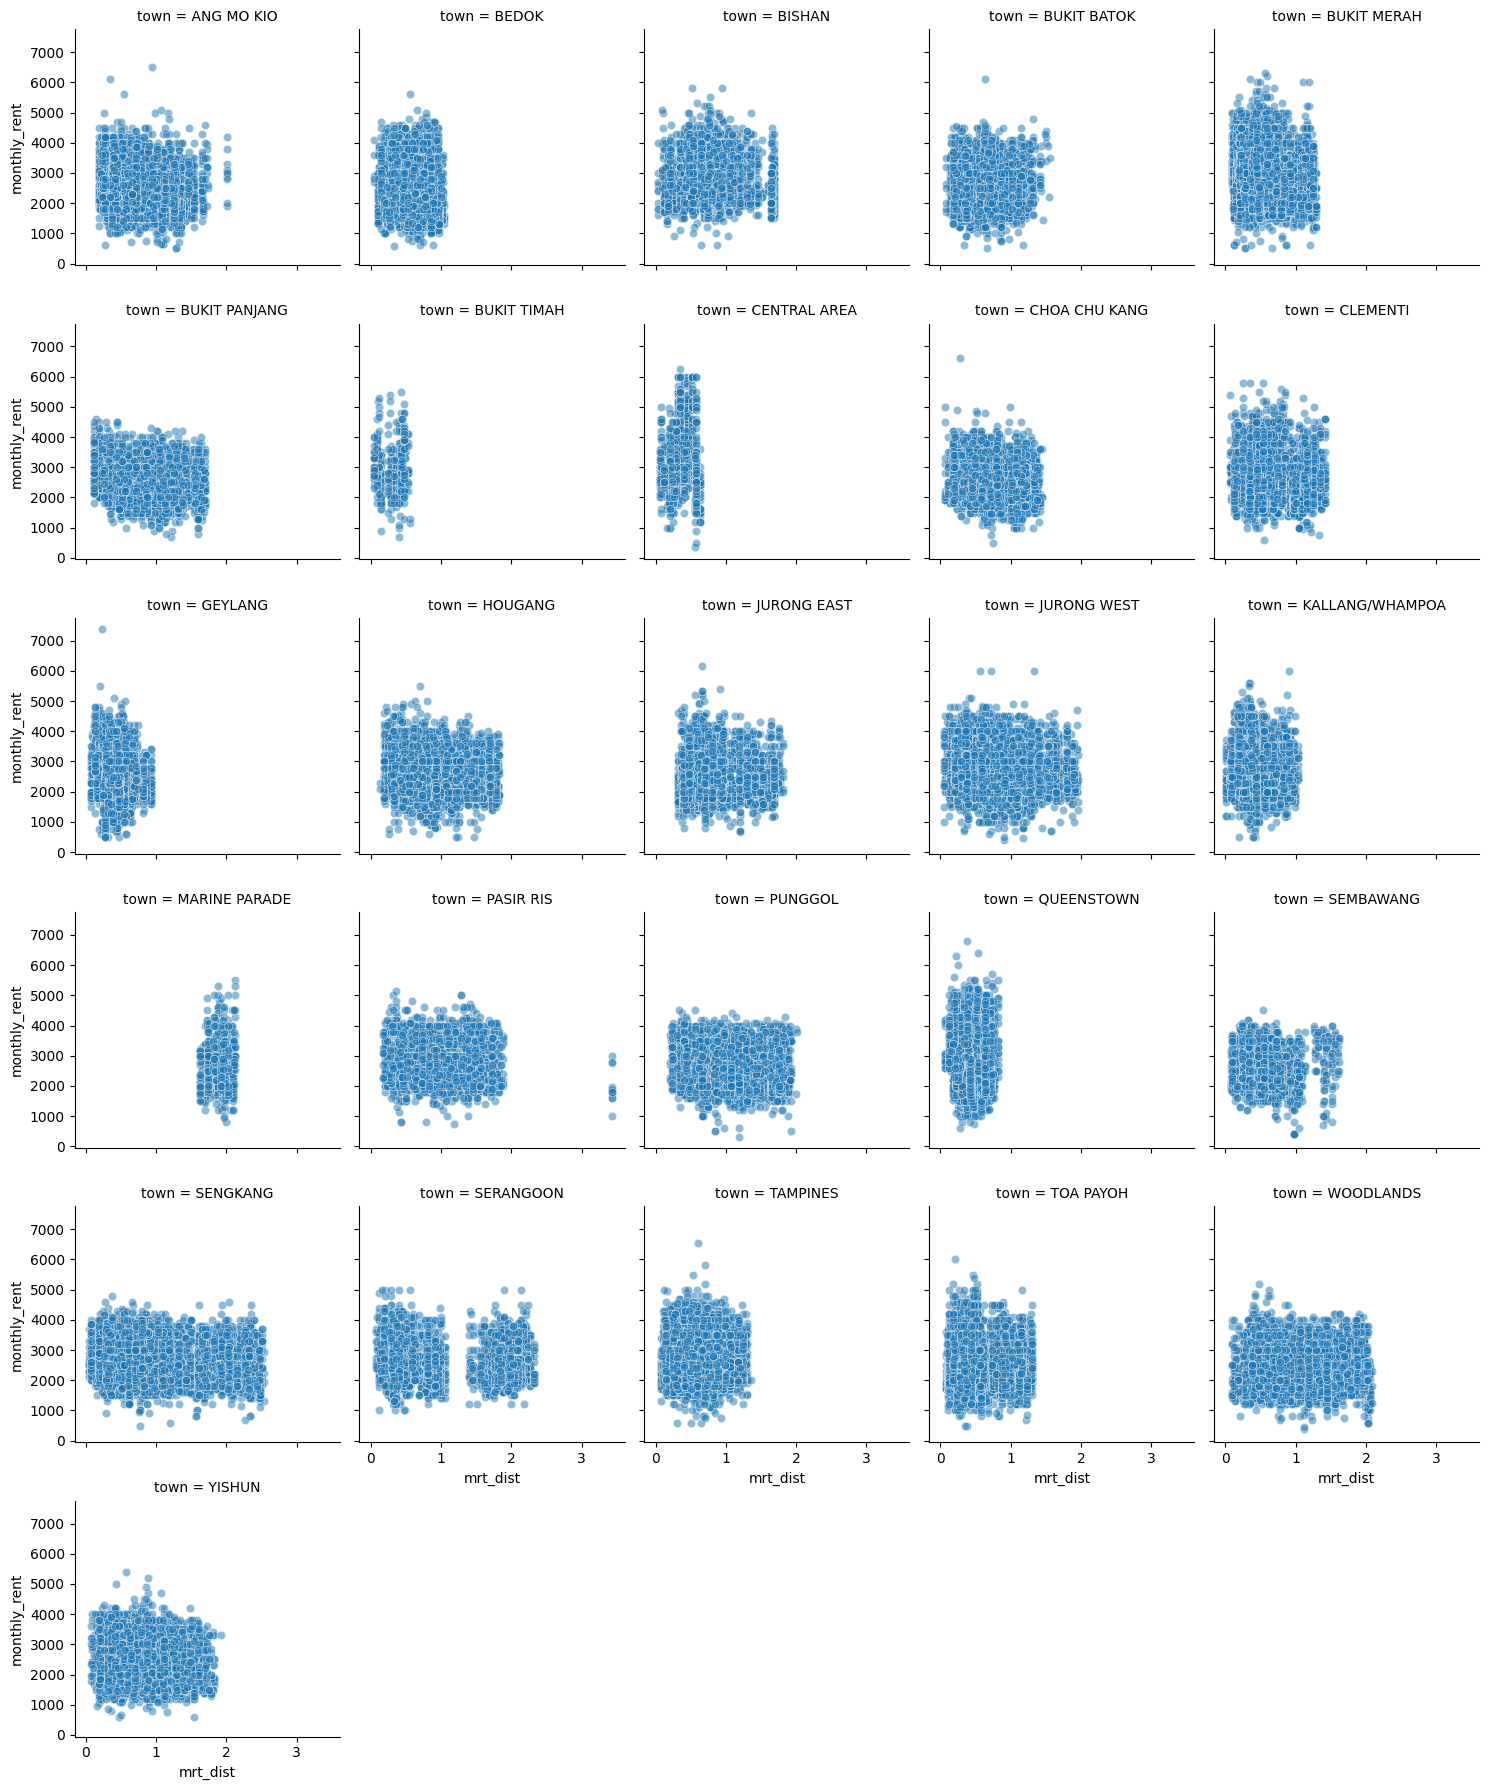

In [26]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
import seaborn as sns

g = sns.FacetGrid(data, col="town", col_wrap=5)
g.map(sns.scatterplot, "mrt_dist","monthly_rent",alpha=0.5)
g.add_legend()

In [27]:
data.to_csv('./data/rental_mrt.csv',encoding='utf-8', index=False)